In [28]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import squarify as sq


# import nltk
# import re
# from nltk.corpus import stopwords
# import string

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv("modified_jobs.csv")
data.head(2)


,Job Title,Key Skills,Role Category,Location,Functional Area,Industry,Role,Qualifications,Average Salary,Experience Category
0,Digital Media Planner,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,M.Tech,79000,Experienced
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,BCA,86000,Junior/Mid-level


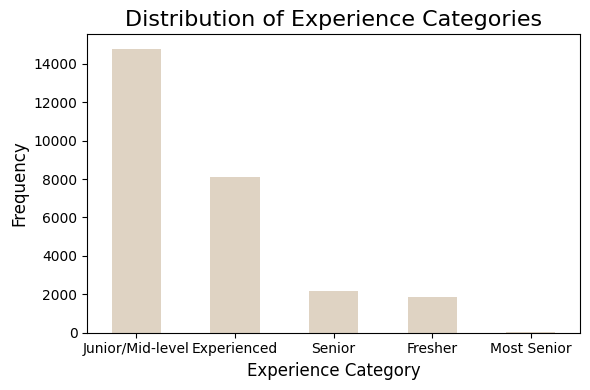

In [3]:

experience_category_counts = data['Experience Category'].value_counts()

plt.figure(figsize=(6, 4))
experience_category_counts.plot(kind = 'bar', color = '#DFD3C3')

plt.title('Distribution of Experience Categories', fontsize = 16)
plt.xlabel('Experience Category', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.xticks(rotation = 360) 
plt.tight_layout()
plt.show()


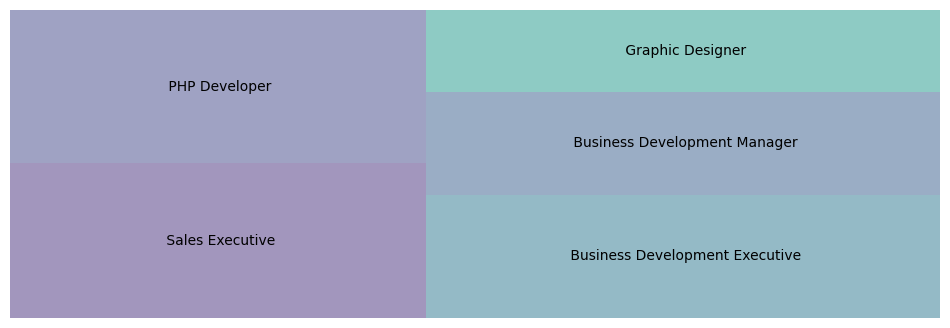

In [4]:
job_title =  data['Job Title'].value_counts().head(5)

plt.figure(figsize=(12,4))
sq.plot(sizes=job_title, label = job_title.index, alpha=.5)
plt.axis('off')
plt.show()

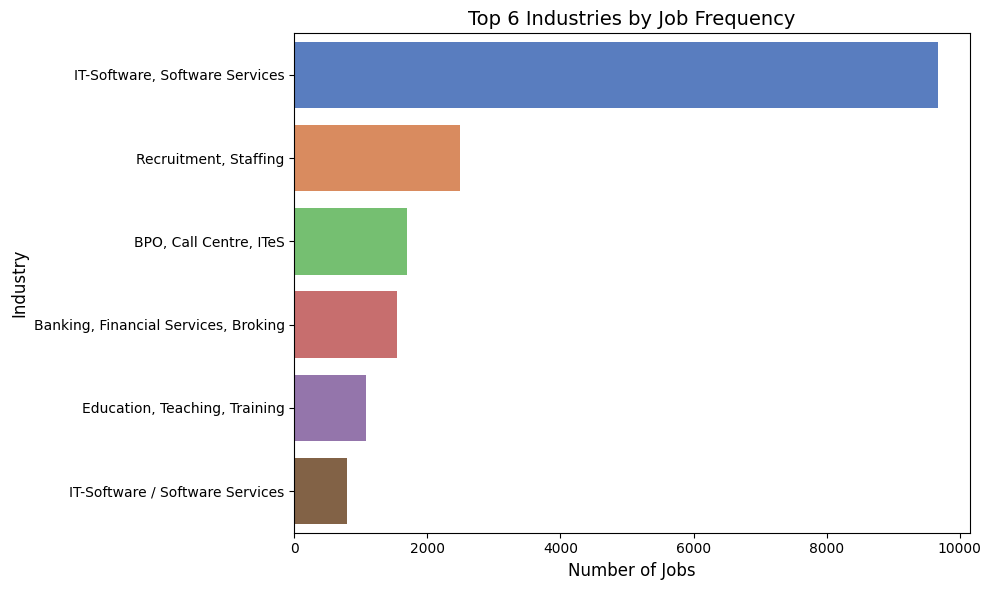

In [8]:
top_industries = data['Industry'].value_counts().head(6)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.values, y=top_industries.index, hue=top_industries.index, palette='muted', legend=False)
plt.title('Top 6 Industries by Job Frequency', fontsize=14)
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.tight_layout()
plt.show()


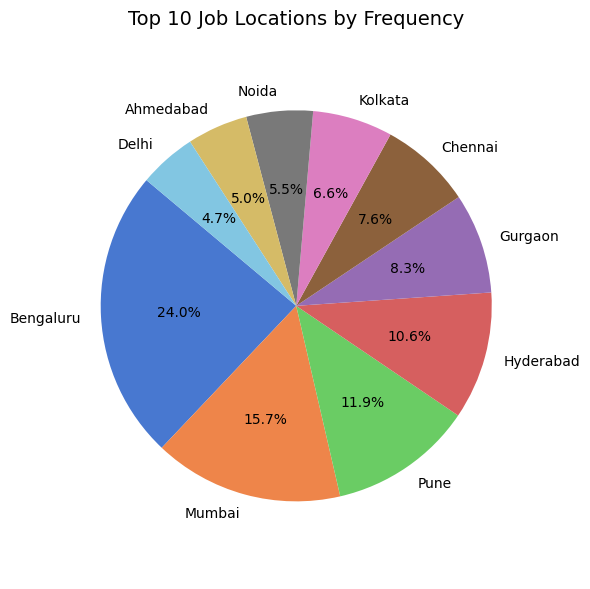

In [24]:
top_locations = data['Location'].value_counts().head(10)

plt.figure(figsize=(6, 6))
plt.pie(top_locations.values, labels=top_locations.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted', n_colors=10))
plt.title('Top 10 Job Locations by Frequency', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

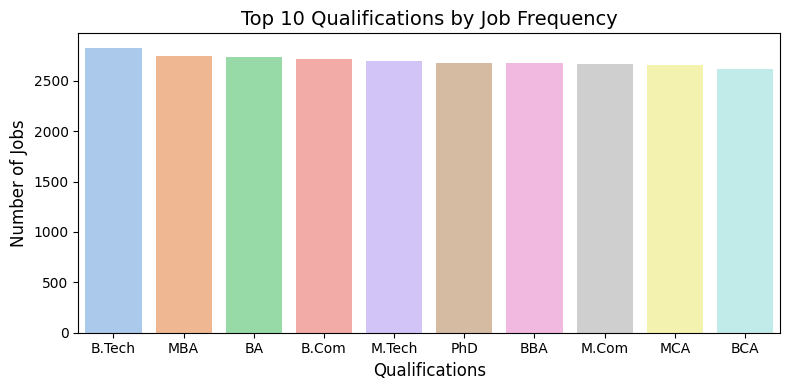

In [25]:
top_qualifications = data['Qualifications'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    x=top_qualifications.index,
    y=top_qualifications.values,
    hue=top_qualifications.index,  
    palette='pastel',
    legend=False
)

plt.title('Top 10 Qualifications by Job Frequency', fontsize=14)
plt.xlabel('Qualifications', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.tight_layout()
plt.show()


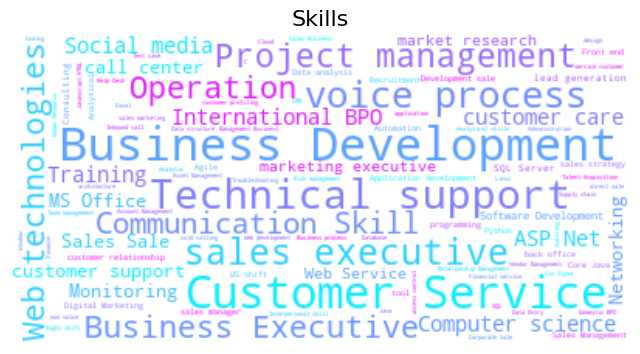

In [31]:
text_skills_area = " ".join(str(area) for area in data["Key Skills"])

stopwords = set(STOPWORDS)
wordcloud_functional_area = WordCloud(stopwords=stopwords, 
                                      background_color="white",
                                      colormap="cool").generate(text_skills_area)


plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_functional_area, interpolation='bilinear')
plt.axis("off")
plt.title("Skills", fontsize=16)
plt.show()



# Content Based Recommendation


In [32]:
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
data['combined_features'] = data['Job Title'] + ' ' + data['Functional Area'] + ' ' + data['Key Skills'] + ' ' + data['Role Category']

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['combined_features'])

In [34]:
def recommend_job_titles(input_title, top_n=5):
    
    input_combined = input_title

    input_vector = vectorizer.transform([input_combined])
    similarity_scores = cosine_similarity(input_vector, tfidf_matrix)
    
    top_indices = similarity_scores.argsort()[0, -top_n-1:-1][::-1]  
    
    return data.iloc[top_indices][['Job Title', 'Key Skills', 'Functional Area', 'Role Category']], similarity_scores[0, top_indices]


In [35]:
user_input = input("Enter your job title to find similar job titles: ")
recommended_jobs, scores = recommend_job_titles(user_input)


print("\nRecommended Job Titles based on Similarity:"'\n')
for idx, row in recommended_jobs.iterrows():
    print(f"Job Title: {row['Job Title']}")
    print(f"Key Skills: {row['Key Skills']}")
    print(f"Functional Area: {row['Functional Area']}")
    print(f"Role Category: {row['Role Category']}")
    print(f"Similarity Score: {scores[recommended_jobs.index.get_loc(idx)]}")
    print("-" * 40)

Enter your job title to find similar job titles:  data analysis



Recommended Job Titles based on Similarity:

Job Title: Data Architecture Principles
Key Skills: R|SAS|Data Analysis|Big Data|Data Collection|Data Modeling|Data Architecture|Data Analytics|ETL|Data Governance
Functional Area: IT Software - DBA , Datawarehousing
Role Category: Programming & Design
Similarity Score: 0.596634219494488
----------------------------------------
Job Title:  MIS Executive / Data Analyst
Key Skills:  web technologies| data entry| CRM| Data Analysis| data mining
Functional Area: Analytics & Business Intelligence
Role Category: Other
Similarity Score: 0.5931091718007431
----------------------------------------
Job Title: Lead Data Scientist
Key Skills: Data Science|Machine Learning|Python|Data Mining|Data Visualization|SQL|Data Analysis|Spark|Data Analytics|Algorithms|Lead Data Scientist
Functional Area: IT Software - DBA , Datawarehousing
Role Category: Programming & Design
Similarity Score: 0.5534570007169027
----------------------------------------
Job Title: